## Assignment
Using the FBI:UCR Crime dataset, build a regression model to predict property crimes. You can use the features you prepared in the previous assignment, new features of your own choosing, or a combination. The goal here is prediction rather than understanding mechanisms, so the focus is on creating a model that explains a lot of variance.

In [80]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.feature_selection import RFE

In [119]:
crime = pd.read_excel('/Users/marenbeckman/Desktop/Data_Science/new_york_by_city_2013.xls')

In [82]:
crime.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [83]:
crime.shape

(351, 13)

In [84]:
crime.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,3.480000e+02,348.000000,348.000000,0.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000
mean,4.003763e+04,201.594828,1.566092,NaN,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658
std,4.500374e+05,2815.268504,18.303673,NaN,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411
min,5.260000e+02,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,NaN,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,NaN,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000
75%,1.842750e+04,22.000000,0.000000,NaN,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000
max,8.396126e+06,52384.000000,335.000000,NaN,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000


In [85]:
crime.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

### Population

In [86]:
crime['Population'].describe()

count    3.480000e+02
mean     4.003763e+04
std      4.500374e+05
min      5.260000e+02
25%      3.003000e+03
50%      7.233500e+03
75%      1.842750e+04
max      8.396126e+06
Name: Population, dtype: float64

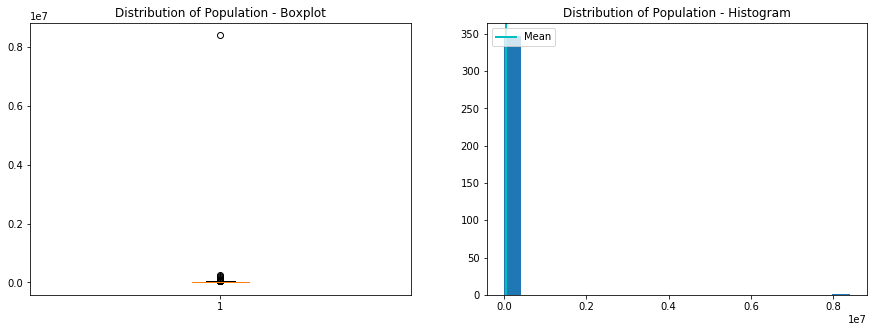

In [87]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(crime['Population'].dropna(how = 'any'))
plt.title('Distribution of Population - Boxplot')

plt.subplot(1, 2, 2)
plt.hist(crime['Population'].dropna(how = 'any'), bins=20)
plt.axvline(crime['Population'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Distribution of Population - Histogram')

plt.show()

### Population Squared

In [120]:
crime['Population_Squared'] = crime['Population'] * crime['Population']

In [89]:
crime['Population_Squared'].describe()

count    3.480000e+02
mean     2.035547e+11
std      3.778876e+12
min      2.766760e+05
25%      9.018117e+06
50%      5.232568e+07
75%      3.397536e+08
max      7.049493e+13
Name: Population_Squared, dtype: float64

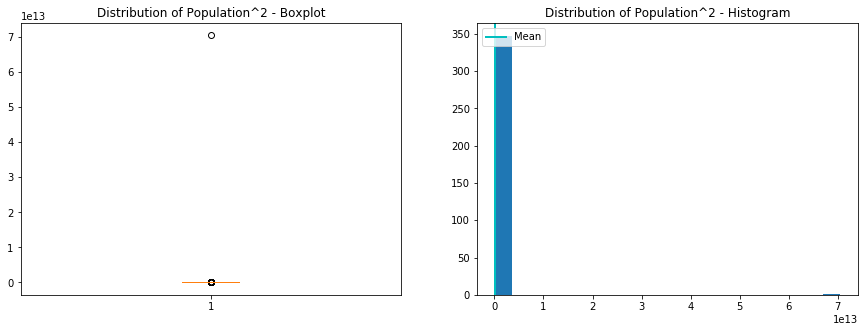

In [90]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(crime['Population_Squared'].dropna(how = 'any'))
plt.title('Distribution of Population^2 - Boxplot')

plt.subplot(1, 2, 2)
plt.hist(crime['Population_Squared'].dropna(how = 'any'), bins=20)
plt.axvline(crime['Population_Squared'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Distribution of Population^2 - Histogram')

plt.show()

### Murder

In [91]:
crime['Murder and\nnonnegligent\nmanslaughter'].describe()

count    348.000000
mean       1.566092
std       18.303673
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      335.000000
Name: Murder and\nnonnegligent\nmanslaughter, dtype: float64

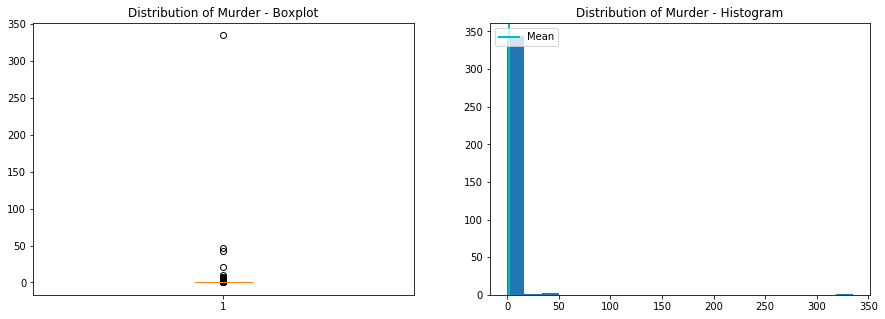

In [92]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(crime['Murder and\nnonnegligent\nmanslaughter'].dropna(how = 'any'))
plt.title('Distribution of Murder - Boxplot')

plt.subplot(1, 2, 2)
plt.hist(crime['Murder and\nnonnegligent\nmanslaughter'].dropna(how = 'any'), bins=20)
plt.axvline(crime['Murder and\nnonnegligent\nmanslaughter'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Distribution of Murder - Histogram')

plt.show()

In [121]:
#transform continuous variable into categorical variable
crime['Murder'] = 0
crime.loc[crime['Murder and\nnonnegligent\nmanslaughter'] > 0, 'Murder'] = 1

(array([0, 1]), <a list of 2 Text xticklabel objects>)

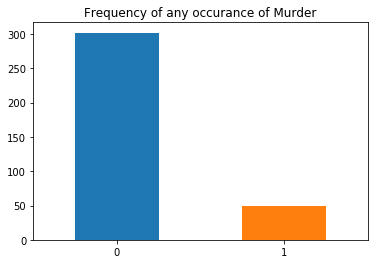

In [94]:
plt.title('Frequency of any occurance of Murder')
pd.value_counts(crime['Murder']).plot.bar()
plt.xticks(rotation = 0)

### Robbery

In [122]:
#reanem original Robbery column so name can be used later
crime.rename(columns={'Robbery': 'Robberies'}, inplace=True)

In [96]:
crime['Robberies'].describe()

count      348.000000
mean        72.902299
std       1031.032873
min          0.000000
25%          0.000000
50%          1.000000
75%          5.000000
max      19170.000000
Name: Robberies, dtype: float64

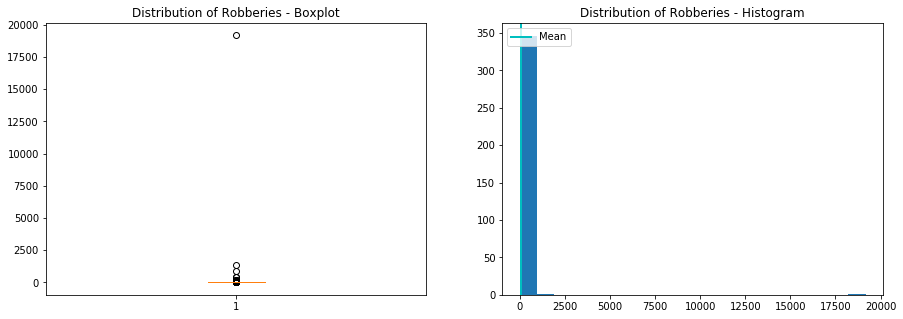

In [97]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(crime['Robberies'].dropna(how = 'any'))
plt.title('Distribution of Robberies - Boxplot')

plt.subplot(1, 2, 2)
plt.hist(crime['Robberies'].dropna(how = 'any'), bins=20)
plt.axvline(crime['Robberies'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Distribution of Robberies - Histogram')

plt.show()

In [123]:
#transform continuous variable into categorical variable
crime['Robbery'] = 0
crime.loc[crime['Robberies'] > 0, 'Robbery'] = 1

(array([0, 1]), <a list of 2 Text xticklabel objects>)

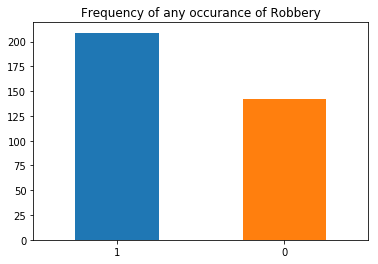

In [99]:
plt.title('Frequency of any occurance of Robbery')
pd.value_counts(crime['Robbery']).plot.bar()
plt.xticks(rotation = 0)

### Create Model

In [124]:
crime.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robberies', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3',
       'Population_Squared', 'Murder', 'Robbery'],
      dtype='object')

In [125]:
#identify missing data from target variable
np.where(np.isnan(crime['Property\ncrime']))

(array([348, 349, 350]),)

In [126]:
print(crime.iloc[348:351])

                                                  City  Population  \
348  1 The figures shown in this column for the off...         NaN   
349  2 The figures shown in this column for the off...         NaN   
350  3 The FBI does not publish arson data unless i...         NaN   

     Violent\ncrime  Murder and\nnonnegligent\nmanslaughter  \
348             NaN                                     NaN   
349             NaN                                     NaN   
350             NaN                                     NaN   

     Rape\n(revised\ndefinition)1  Rape\n(legacy\ndefinition)2  Robberies  \
348                           NaN                          NaN        NaN   
349                           NaN                          NaN        NaN   
350                           NaN                          NaN        NaN   

     Aggravated\nassault  Property\ncrime  Burglary  Larceny-\ntheft  \
348                  NaN              NaN       NaN              NaN   
349          

In [136]:
#drop rows where data is not listed for target variable
crime = crime[np.isfinite(crime['Property\ncrime'])]
crime.shape

(348, 16)

In [137]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime['Property\ncrime'].values.reshape(-1, 1)
X = crime[['Population','Population_Squared','Murder', 'Robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 3.46570268e-02 -2.11108019e-09  1.51866535e+01 -9.62774363e+01]]

Intercept: 
 [-109.57533562]

R-squared:
0.9961247104988709


With the prescribed variables, we get a very high R-squared value, meaning our model has very high predictive accuracy

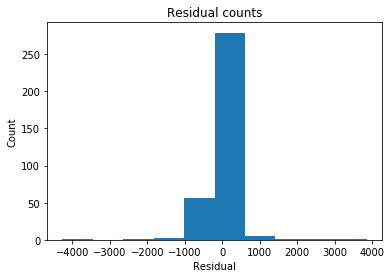

In [138]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = crime['Property\ncrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

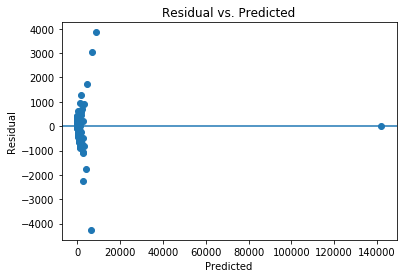

In [139]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

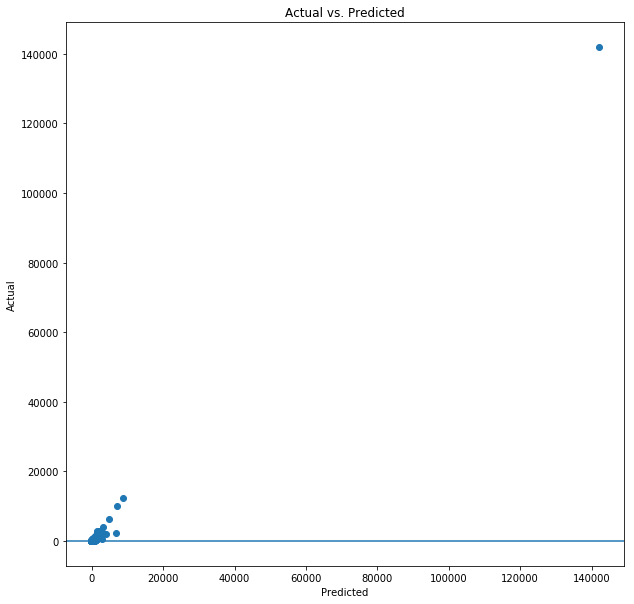

In [143]:
plt.figure(figsize=(10, 10))
plt.scatter(predicted, actual)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.axhline(y=0)
plt.title('Actual vs. Predicted')
plt.show()

That one outlier is troubling, let's explore further

In [142]:
print(crime.loc[crime['Property\ncrime'] > 10000])

          City  Population  Violent\ncrime  \
35     Buffalo    258789.0          3249.0   
216   New York   8396126.0         52384.0   
272  Rochester    210562.0          2107.0   

     Murder and\nnonnegligent\nmanslaughter  Rape\n(revised\ndefinition)1  \
35                                     47.0                           NaN   
216                                   335.0                           NaN   
272                                    42.0                           NaN   

     Rape\n(legacy\ndefinition)2  Robberies  Aggravated\nassault  \
35                         145.0     1322.0               1735.0   
216                       1112.0    19170.0              31767.0   
272                         92.0      918.0               1055.0   

     Property\ncrime  Burglary  Larceny-\ntheft  Motor\nvehicle\ntheft  \
35           12491.0    3458.0           8076.0                  957.0   
216         141971.0   16606.0         117931.0                 7434.0   
272        

The highest property crime numbers are in large cities, especially the gigantic city of NYC... let's see what that looks like.

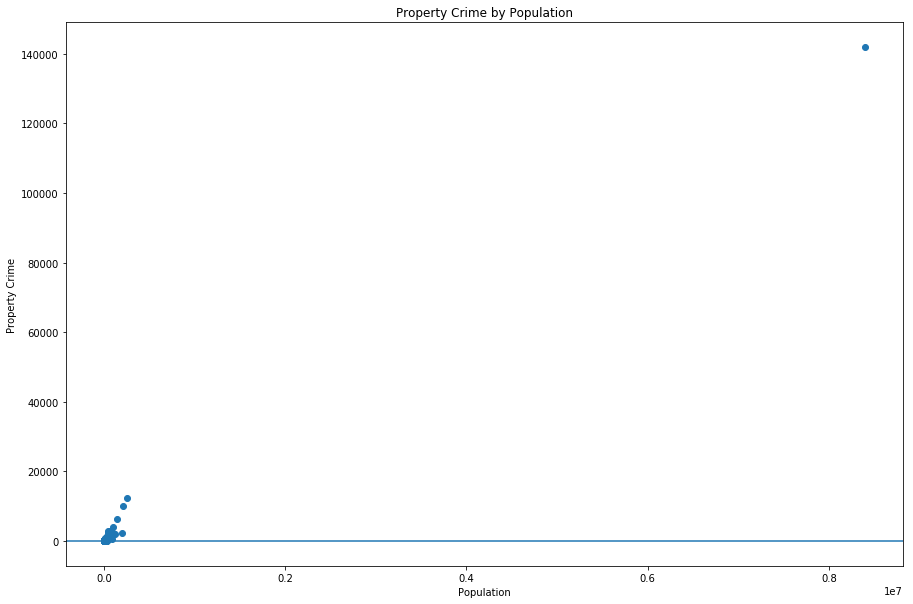

In [145]:
plt.figure(figsize=(15, 10))
plt.scatter(crime['Population'], actual)
plt.xlabel('Population')
plt.ylabel('Property Crime')
plt.axhline(y=0)
plt.title('Property Crime by Population')
plt.show()

### Log of Population
To better account for the outliers in population that make for outliers in crime, let's take a log of the population.

In [149]:
crime['Population_Log'] = np.log(crime['Population'])

In [150]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime['Property\ncrime'].values.reshape(-1, 1)
X = crime[['Population','Population_Squared','Murder', 'Robbery', 'Population_Log']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 4.08999319e-02 -2.83097881e-09  8.87685414e+01  1.25834176e+02
  -2.45693299e+02]]

Intercept: 
 [1843.70581025]

R-squared:
0.9965801622317042


The predictive accuracy improved by 0.0005, from 0.9961 to 0.9966

### Remove NYC
the scale of New York City makes all of it's data outliers

In [155]:
crime_noNYC = crime.loc[(crime['City']) != 'New York']
crime_noNYC.shape

(347, 17)

In [156]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime_noNYC['Property\ncrime'].values.reshape(-1, 1)
X = crime_noNYC[['Population','Population_Squared','Murder', 'Robbery', 'Population_Log']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[1.24548939e-02 1.16564097e-07 1.95225074e+02 8.84827844e+01
  7.69565186e+00]]

Intercept: 
 [-76.71208324]

R-squared:
0.8445072808497107


Taking out the data for New York City has reduced the R-squared value - the model describes less variance in our target data.  But what do the errors show?

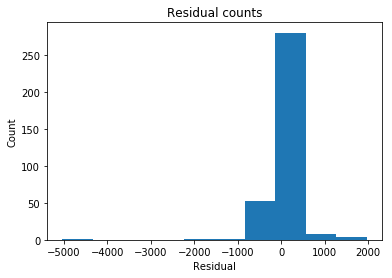

In [167]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = crime_noNYC['Property\ncrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

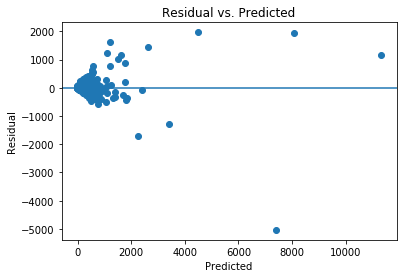

In [164]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

The error range has been reduced from 8000 to 7000 - that doesn't seem like enough improvement for the reduced R-squared value.

### Heatmap to explore existing variables and identify alternate features

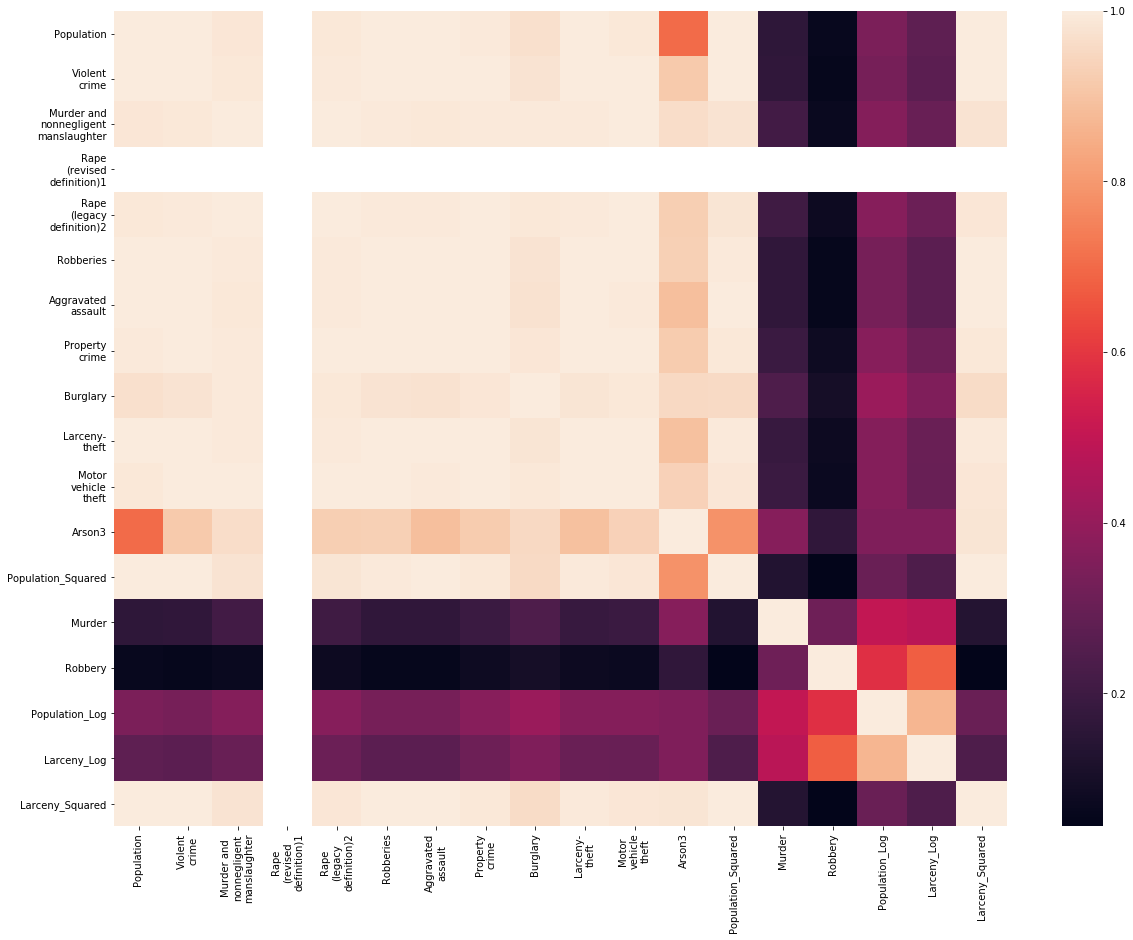

In [182]:
plt.figure(figsize=(20,15))
sns.heatmap(crime.corr())

This heatmap of all the data from New York state looks pretty extreme... let's see what removing the great outlier of New York City will do for clarity...

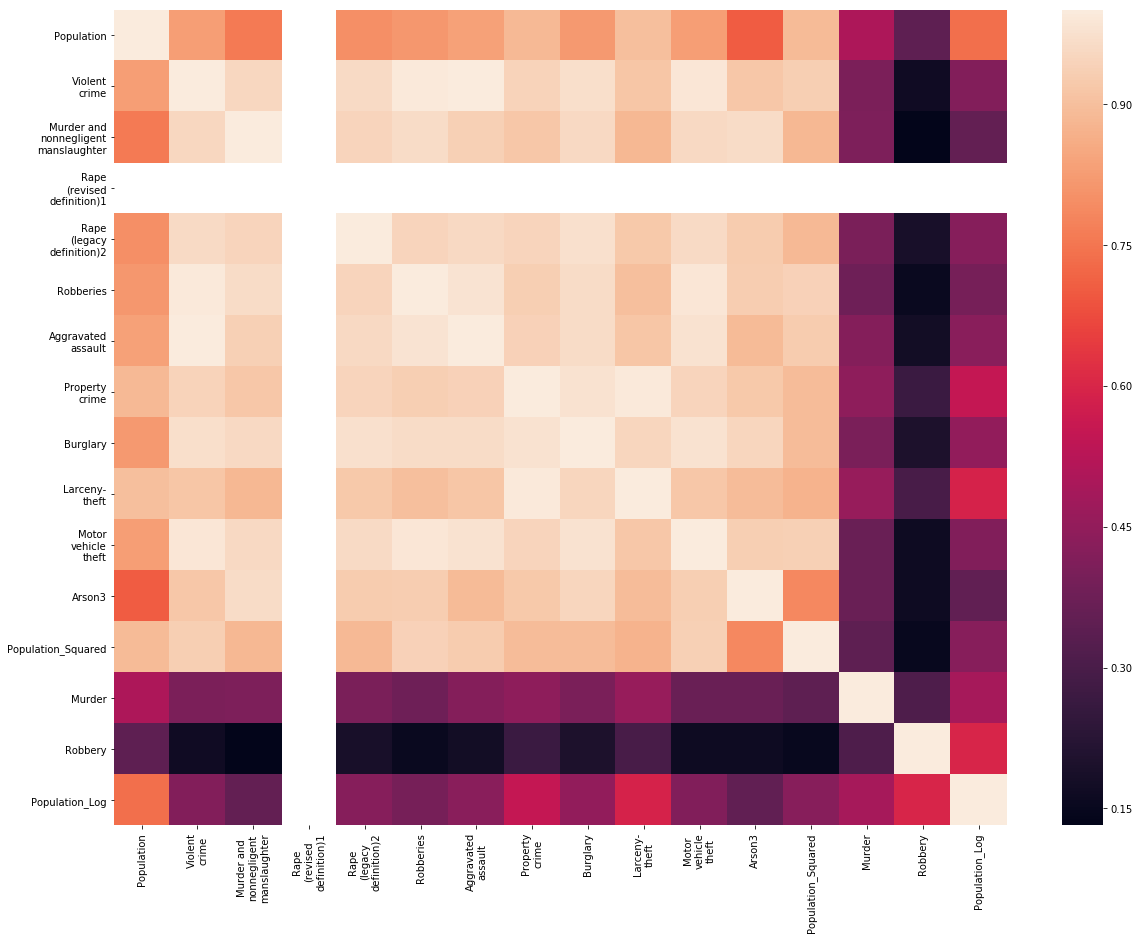

In [181]:
plt.figure(figsize=(20,15))
sns.heatmap(crime_noNYC.corr())

The heatmap indicates that the target variable of Property Crime shows a strong correlation with Larceny & Theft, as well as Burglary, so let's try those as a feature...

### Larceny-Theft

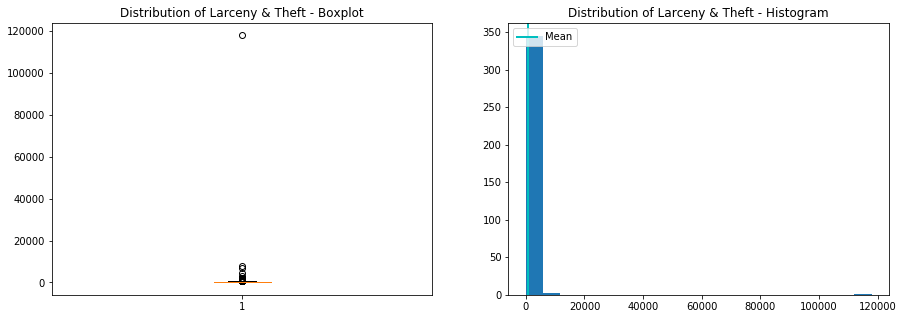

In [170]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(crime['Larceny-\ntheft'].dropna(how = 'any'))
plt.title('Distribution of Larceny & Theft - Boxplot')

plt.subplot(1, 2, 2)
plt.hist(crime['Larceny-\ntheft'].dropna(how = 'any'), bins=20)
plt.axvline(crime['Larceny-\ntheft'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Distribution of Larceny & Theft - Histogram')

plt.show()

In [169]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime['Property\ncrime'].values.reshape(-1, 1)
X = crime[['Population','Population_Squared','Murder', 'Robbery', 'Population_Log', 'Larceny-\ntheft']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 6.81699161e-04 -5.20955695e-10  1.93802968e+00 -1.34038963e+01
  -5.08984853e+01  1.47032742e+00]]

Intercept: 
 [398.35980592]

R-squared:
0.9998430134777155


Adding Larceny as a feature has increased the R-square value by 0.0032, from 0.9966 to 0.9998

What happens when a second Larceny based feature is added?

In [173]:
crime['Larceny_Squared'] = crime['Larceny-\ntheft'] * crime['Larceny-\ntheft']

In [174]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime['Property\ncrime'].values.reshape(-1, 1)
X = crime[['Population','Population_Squared','Murder', 'Robbery', 'Population_Log', 'Larceny-\ntheft', 'Larceny_Squared']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 2.41870392e-03 -1.01323913e-08  4.93207332e+01  2.24857125e+00
  -1.77520232e+01  1.14244896e+00  5.04260263e-05]]

Intercept: 
 [135.79202894]

R-squared:
0.9999266434286497


The new Larceny Squared Feature had increased the R-square value by 0.0001, from 0.9998 to 0.9999 

### Burglary

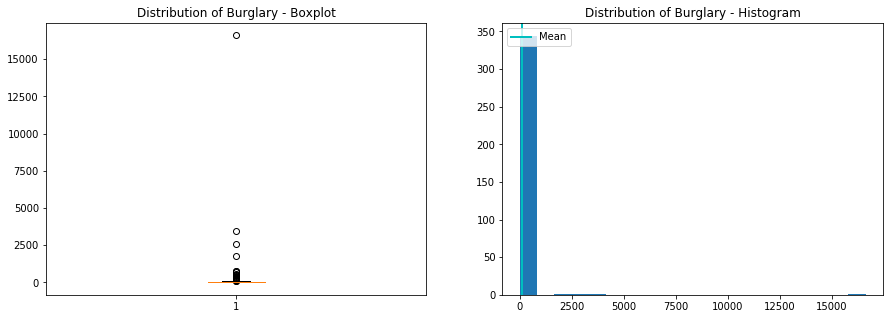

In [176]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(crime['Burglary'].dropna(how = 'any'))
plt.title('Distribution of Burglary - Boxplot')

plt.subplot(1, 2, 2)
plt.hist(crime['Burglary'].dropna(how = 'any'), bins=20)
plt.axvline(crime['Burglary'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.title('Distribution of Burglary - Histogram')

plt.show()

In [178]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = crime['Property\ncrime'].values.reshape(-1, 1)
X = crime[['Population','Population_Squared','Murder', 'Robbery','Population_Log', 'Larceny-\ntheft', 'Larceny_Squared', 'Burglary']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 1.06190047e-03 -1.03669799e-09 -7.07896574e-01  2.52359441e+00
  -5.61983423e+00  9.59456427e-01  5.24683538e-06  1.20813611e+00]]

Intercept: 
 [41.42143649]

R-squared:
0.9999981503228312


Adding Burglary to the feature list has increased the R-squared value - but we're so close to 1 that we'll have to add some decimal places to even compare - we now have five decimal places of 9s, an improvement of 0.00007

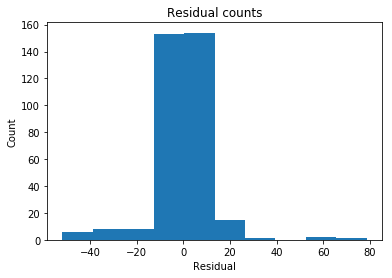

In [183]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = crime['Property\ncrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

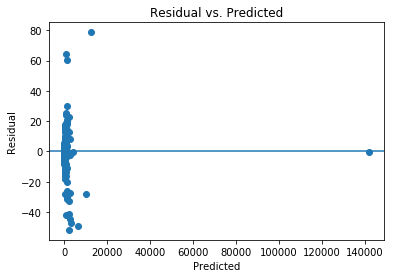

In [184]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

So now we have a model with a very high R-squared value and a residual range under 150.